# Линейная регрессия и стохастический градиентный спуск

Задание основано на материалах лекций по линейной регрессии и градиентному спуску. Вы будете прогнозировать выручку компании в зависимости от уровня ее инвестиций в рекламу по TV, в газетах и по радио.

## Вы научитесь:
- решать задачу восстановления линейной регрессии
- реализовывать стохастический градиентный спуск для ее настройки
- решать задачу линейной регрессии аналитически

## Введение
Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.  

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

## Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска.
Градиентный шаг для весов будет выглядеть следующим образом:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\}$$
Здесь $\eta$ - параметр, шаг градиентного спуска.

## Стохастический градиентный спуск
Проблема градиентного спуска, описанного выше, в том, что на больших выборках считать на каждом шаге градиент по всем имеющимся данным может быть очень вычислительно сложно. 
В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$
где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

## Нормальное уравнение 
Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, приближающий целевой признак, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$\Large y = Xw$$
Домножением слева на $X^T$ получаем:
$$\Large X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$\Large w = {(X^TX)}^{-1}X^Ty$$
Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). 
На практике лучше находить вектор весов $w$ решением матричного уравнения 
$$\Large X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).

Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

## Инструкции по выполнению

В начале напишем простую функцию для записи ответов в текстовый файл. Ответами будут числа, полученные в ходе решения этого задания, округленные до 3 знаков после запятой. Полученные файлы после выполнения задания надо отправить в форму на странице задания на Coursera.org.

In [ ]:
def write_answer_to_file(answer, filename):
    with open(filename, 'w') as f_out:
        f_out.write(str(round(answer, 3)))

**1. Загрузите данные из файла *advertising.csv* в объект pandas DataFrame. [Источник данных](http://www-bcf.usc.edu/~gareth/ISL/data.html).**

In [ ]:
import pandas as pd
adver_data = pd.read_csv('advertising.csv')

**Посмотрите на первые 5 записей и на статистику признаков в этом наборе данных.**

In [ ]:
adver_data.head(5)# Ваш код здесь

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


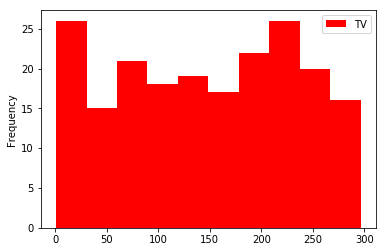

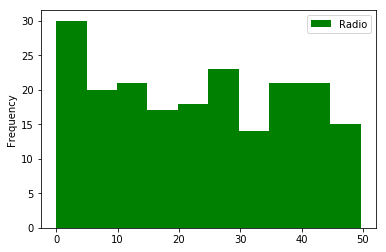

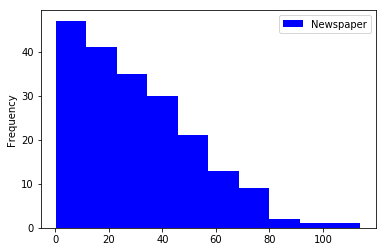

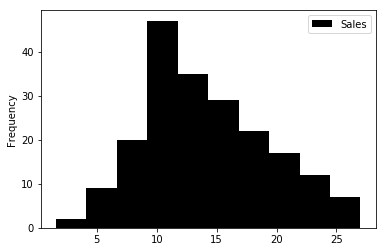

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
adver_data.plot(y="TV",kind='hist',color='red')# Ваш код здесь
adver_data.plot(y="Radio",kind='hist',color='green')# Ваш код здесь
adver_data.plot(y="Newspaper",kind='hist',color='blue')# Ваш код здесь
adver_data.plot(y="Sales",kind='hist',color='black')# Ваш код здесь

**Создайте массивы NumPy *X* из столбцов TV, Radio и Newspaper и *y* - из столбца Sales. Используйте атрибут *values* объекта pandas DataFrame.**

In [ ]:
import numpy as np
?np.zeros
X=np.zeros((200,3))
y=np.zeros((200,1))
all_values=adver_data.values
i=0
for value_arr in all_values:
    for it in range(0,3):
        X[i][it]=value_arr[it]
    y[i][0]=value_arr[3]
    i+=1
print X.shape
print np.mean(y,axis=0)

(200, 3)
[14.0225]


`**Отмасштабируйте столбцы матрицы *X*, вычтя из каждого значения среднее по соответствующему столбцу и поделив результат на стандартное отклонение. Для определенности, используйте методы mean и std векторов NumPy (реализация std в Pandas может отличаться). Обратите внимание, что в numpy вызов функции .mean() без параметров возвращает среднее по всем элементам массива, а не по столбцам, как в pandas. Чтобы произвести вычисление по столбцам, необходимо указать параметр axis.**

In [ ]:
means=np.mean(X,axis=0)
stds =np.std(X,axis=0) # Ваш код здесь
print means

[147.0425  23.264   30.554 ]


In [ ]:
i=0
for i in range(0,200):
    for j in range (0,3):
        X[i][j]-=means[j]
        X[i][j]/=float(stds[j])
    i+=1
print X
# Ваш код здесь

[[ 9.69852266e-01  9.81522472e-01  1.77894547e+00]
 [-1.19737623e+00  1.08280781e+00  6.69578760e-01]
 [-1.51615499e+00  1.52846331e+00  1.78354865e+00]
 [ 5.20496822e-02  1.21785493e+00  1.28640506e+00]
 [ 3.94182198e-01 -8.41613655e-01  1.28180188e+00]
 [-1.61540845e+00  1.73103399e+00  2.04592999e+00]
 [-1.04557682e+00  6.43904671e-01 -3.24708413e-01]
 [-3.13436589e-01 -2.47406325e-01 -8.72486994e-01]
 [-1.61657614e+00 -1.42906863e+00 -1.36042422e+00]
 [ 6.16042873e-01 -1.39530685e+00 -4.30581584e-01]
 [-9.45155670e-01 -1.17923146e+00 -2.92486143e-01]
 [ 7.90028350e-01  4.96973404e-02 -1.22232878e+00]
 [-1.43908760e+00  7.99208859e-01  1.62704048e+00]
 [-5.78501712e-01 -1.05768905e+00 -1.07502697e+00]
 [ 6.66253447e-01  6.50657027e-01  7.11007392e-01]
 [ 5.64664612e-01  1.65000572e+00  1.02862691e+00]
 [-9.25304978e-01  9.00494200e-01  3.84117072e+00]
 [ 1.56887609e+00  1.10306488e+00  1.16211917e+00]
 [-9.08957349e-01 -1.86635121e-01 -5.64073843e-01]
 [ 3.00679600e-03  4.29449843e-

**Добавьте к матрице *X* столбец из единиц, используя методы *hstack*, *ones* и *reshape* библиотеки NumPy. Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.**

In [ ]:
l=np.ones((200,1))
#print l
X1 = np.hstack ((X,l))# Ваш код здесь
print X1
'''
print X
X1=np.reshape(X,(200,2))
print X1
'''

[[ 9.69852266e-01  9.81522472e-01  1.77894547e+00  1.00000000e+00]
 [-1.19737623e+00  1.08280781e+00  6.69578760e-01  1.00000000e+00]
 [-1.51615499e+00  1.52846331e+00  1.78354865e+00  1.00000000e+00]
 [ 5.20496822e-02  1.21785493e+00  1.28640506e+00  1.00000000e+00]
 [ 3.94182198e-01 -8.41613655e-01  1.28180188e+00  1.00000000e+00]
 [-1.61540845e+00  1.73103399e+00  2.04592999e+00  1.00000000e+00]
 [-1.04557682e+00  6.43904671e-01 -3.24708413e-01  1.00000000e+00]
 [-3.13436589e-01 -2.47406325e-01 -8.72486994e-01  1.00000000e+00]
 [-1.61657614e+00 -1.42906863e+00 -1.36042422e+00  1.00000000e+00]
 [ 6.16042873e-01 -1.39530685e+00 -4.30581584e-01  1.00000000e+00]
 [-9.45155670e-01 -1.17923146e+00 -2.92486143e-01  1.00000000e+00]
 [ 7.90028350e-01  4.96973404e-02 -1.22232878e+00  1.00000000e+00]
 [-1.43908760e+00  7.99208859e-01  1.62704048e+00  1.00000000e+00]
 [-5.78501712e-01 -1.05768905e+00 -1.07502697e+00  1.00000000e+00]
 [ 6.66253447e-01  6.50657027e-01  7.11007392e-01  1.00000000e

'\nprint X\nX1=np.reshape(X,(200,2))\nprint X1\n'

**2. Реализуйте функцию *mserror* - среднеквадратичную ошибку прогноза. Она принимает два аргумента - объекты Series *y* (значения целевого признака) и *y\_pred* (предсказанные значения). Не используйте в этой функции циклы - тогда она будет вычислительно неэффективной.**

In [ ]:
def mserror(y, y_pred):
    res=(sum((y-y_pred)**2))/float(y.shape[0])
    return res
xd=np.array([[2],[1]])
xd1=np.array([[3],[1]])
ww=pd.Series(np.reshape(y,(200,)))
ww1=pd.Series(np.reshape(y,(200,)))
print ww[0]
print mserror(ww,ww1)

22.1
0.0


**Какова среднеквадратичная ошибка прогноза значений Sales, если всегда предсказывать медианное значение Sales по исходной выборке? Запишите ответ в файл '1.txt'.**

In [ ]:
res=np.array([])
y1=list(y)
y1=np.reshape(y1,(200,))
y1.sort()
print y1
for x in range(1,201):
    res=np.append(res,(y1[99]+y1[100])/2)
print res
answer1 = mserror(pd.Series(np.reshape(y,(200,))),pd.Series(res))# Ваш код здесь
print answer1
write_answer_to_file(answer1, '1.txt')

[ 1.6  3.2  4.8  5.3  5.3  5.5  5.6  5.7  5.9  6.6  6.6  6.7  6.9  7.
  7.2  7.2  7.3  7.3  7.6  7.6  8.   8.1  8.4  8.5  8.6  8.7  8.7  8.7
  8.8  8.8  9.2  9.3  9.3  9.4  9.5  9.5  9.5  9.6  9.6  9.7  9.7  9.7
  9.7  9.7  9.9 10.1 10.1 10.1 10.3 10.3 10.4 10.4 10.5 10.5 10.6 10.6
 10.6 10.7 10.8 10.8 10.9 10.9 11.  11.  11.2 11.3 11.3 11.4 11.4 11.5
 11.5 11.6 11.6 11.6 11.7 11.7 11.7 11.7 11.8 11.8 11.8 11.9 11.9 11.9
 12.  12.  12.2 12.2 12.2 12.3 12.4 12.5 12.5 12.6 12.6 12.7 12.8 12.8
 12.9 12.9 12.9 12.9 13.2 13.2 13.2 13.3 13.4 13.4 13.4 13.6 14.  14.1
 14.2 14.4 14.5 14.6 14.6 14.7 14.7 14.8 14.8 14.9 14.9 15.  15.  15.2
 15.2 15.3 15.5 15.5 15.5 15.6 15.7 15.9 15.9 15.9 15.9 16.  16.1 16.6
 16.6 16.7 16.9 17.  17.1 17.1 17.2 17.3 17.3 17.4 17.4 17.6 18.  18.
 18.  18.3 18.4 18.5 18.9 18.9 19.  19.  19.2 19.2 19.4 19.6 19.6 19.7
 19.8 20.1 20.2 20.2 20.7 20.7 20.7 20.8 21.2 21.4 21.5 21.7 21.8 22.1
 22.2 22.3 22.4 22.6 22.6 23.2 23.7 23.8 23.8 24.2 24.4 24.7 25.4 25.4
 25.4 25

**3. Реализуйте функцию *normal_equation*, которая по заданным матрицам (массивам NumPy) *X* и *y* вычисляет вектор весов $w$ согласно нормальному уравнению линейной регрессии.**

In [ ]:
def normal_equation(X, y):
    return np.linalg.pinv (X).dot(y)  # Ваш код здесь

In [ ]:
%%time
norm_eq_weights = normal_equation(X1, y)

print(norm_eq_weights)

[[ 3.91925365]
 [ 2.79206274]
 [-0.02253861]
 [14.0225    ]]
Wall time: 345 ms


**Какие продажи предсказываются линейной моделью с весами, найденными с помощью нормального уравнения, в случае средних инвестиций в рекламу по ТВ, радио и в газетах? (то есть при нулевых значениях масштабированных признаков TV, Radio и Newspaper). Запишите ответ в файл '2.txt'.**

In [ ]:
answer2 = norm_eq_weights[3]
print(answer2)
write_answer_to_file(answer2, '2.txt')

[14.0225]


**4. Напишите функцию *linear_prediction*, которая принимает на вход матрицу *X* и вектор весов линейной модели *w*, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы *X* с весами *w*.**

In [ ]:
def linear_prediction(X, w):
    return X.dot(w)
t=np.array ([[1,1,1],[2,2,2]])
t1=np.array ([1,2,3])
print linear_prediction(t,t1)

[ 6 12]


**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью нормального уравнения? Запишите ответ в файл '3.txt'.**

In [ ]:
answer3 = mserror(pd.Series(np.reshape(y,(200,))),pd.Series(np.reshape(linear_prediction(X1,norm_eq_weights),(200,))))
print(answer3)
print linear_prediction(X1,norm_eq_weights)
write_answer_to_file(answer3, '3.txt')

2.784126314510936
[[20.52397441]
 [12.33785482]
 [12.30767078]
 [17.59782951]
 [13.18867186]
 [12.47834763]
 [11.72975995]
 [12.12295317]
 [ 3.72734086]
 [12.55084872]
 [ 7.0322992 ]
 [17.28512918]
 [10.57712073]
 [ 8.82630048]
 [18.43436638]
 [20.81929952]
 [12.82365674]
 [23.22495716]
 [ 9.95168206]
 [14.16607293]
 [18.10076728]
 [14.7405382 ]
 [ 6.4891503 ]
 [16.5459329 ]
 [ 8.14651887]
 [15.6100386 ]
 [14.98951429]
 [17.05167344]
 [19.41053803]
 [ 9.14402389]
 [21.6339338 ]
 [11.3460929 ]
 [ 7.63888314]
 [18.86426829]
 [ 7.57483051]
 [17.00682618]
 [23.40590052]
 [15.62347779]
 [ 9.90868103]
 [20.44761039]
 [16.37766467]
 [17.2959832 ]
 [21.59580326]
 [13.96385684]
 [ 8.88787996]
 [15.16152314]
 [ 8.87338673]
 [21.7226299 ]
 [16.26362018]
 [ 8.1681656 ]
 [12.63121132]
 [ 9.33981296]
 [20.66297563]
 [19.94469957]
 [20.37443008]
 [21.2926106 ]
 [ 8.52771254]
 [12.77458802]
 [21.89805198]
 [18.13348698]
 [ 5.74215558]
 [22.89067208]
 [16.78426073]
 [13.21069202]
 [16.97773556]
 [ 7.84

**5. Напишите функцию *stochastic_gradient_step*, реализующую шаг стохастического градиентного спуска для линейной регрессии. Функция должна принимать матрицу *X*, вектора *y* и *w*, число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов, а также число *$\eta$* (eta) - шаг градиентного спуска (по умолчанию *eta*=0.01). Результатом будет вектор обновленных весов. Наша реализация функции будет явно написана для данных с 3 признаками, но несложно модифицировать для любого числа признаков, можете это сделать.**

In [ ]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    grad0 = X[train_ind][0]*(2*(np.dot(X[train_ind],w)-y[train_ind]))/200
    grad1 = X[train_ind][1]*(2*(np.dot(X[train_ind],w)-y[train_ind]))/200
    grad2 = X[train_ind][2]*(2*(np.dot(X[train_ind],w)-y[train_ind]))/200
    grad3 = (2*(np.dot(X[train_ind],w)-y[train_ind]))/200
    return  w - (eta * np.reshape(np.array([grad0,grad1,grad2,grad3]),(1,4)))

**6. Напишите функцию *stochastic_gradient_descent*, реализующую стохастический градиентный спуск для линейной регрессии. Функция принимает на вход следующие аргументы:**
- X - матрица, соответствующая обучающей выборке
- y - вектор значений целевого признака
- w_init - вектор начальных весов модели
- eta - шаг градиентного спуска (по умолчанию 0.01)
- max_iter - максимальное число итераций градиентного спуска (по умолчанию 10000)
- max_weight_dist - максимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,
при котором алгоритм прекращает работу (по умолчанию 1e-8)
- seed - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию 42)
- verbose - флаг печати информации (например, для отладки, по умолчанию False)

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

In [ ]:
from numpy.linalg import norm
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e5,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    weight = list(w_init)
    w_init=np.array(w_init)
    weight=np.reshape(weight,(w_init.shape[0],))
    # Сюда будем записывать ошибки на каждой итерации
    errors = np.array([])
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)
        
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        weight=np.reshape(weight,(4, ))
        random_ind = np.random.randint(X.shape[0])
        new_weight=[]
        new_weight=stochastic_gradient_step(X,y,weight,random_ind,0.01)
        weight_dist=norm(new_weight-weight,ord=2)
        weight=list(new_weight)
        weight=np.reshape(weight,(4,1))
        iter_num+=1
        errors=np.append(errors,mserror(pd.Series(np.reshape(y,(200,))),pd.Series(np.reshape(linear_prediction(X,weight),(200,)))))
        # Ваш код здесь
    return weight, errors


 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов *w_init*, состоящий из нулей. Оставьте параметры  *eta* и *seed* равными их значениям по умолчанию (*eta*=0.01, *seed*=42 - это важно для проверки ответов).**

In [ ]:
%%time
w_init=[0,0,0,0]
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X1,y,w_init,1e-2,1e5,1e-8,42,False)
print stoch_errors_by_iter

[223.665389   223.63640485 223.5549101  ...   2.7844108    2.78441259
   2.78441259]
Wall time: 2min 13s


**Посмотрим, чему равна ошибка на первых 50 итерациях стохастического градиентного спуска. Видим, что ошибка не обязательно уменьшается на каждой итерации.**

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'MSE')

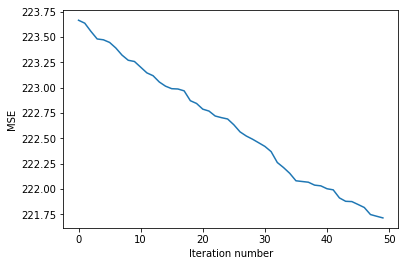

In [ ]:
%pylab inline
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')


**Теперь посмотрим на зависимость ошибки от номера итерации для $10^5$ итераций стохастического градиентного спуска. Видим, что алгоритм сходится.**

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'MSE')

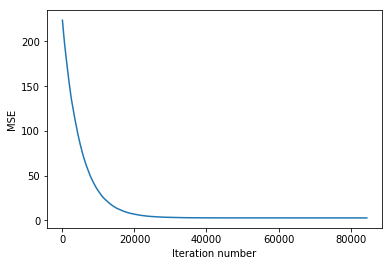

In [ ]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

**Посмотрим на вектор весов, к которому сошелся метод.**

In [ ]:
stoch_grad_desc_weights

array([[ 3.91069256e+00],
       [ 2.78209808e+00],
       [-8.10462217e-03],
       [ 1.40190566e+01]])

**Посмотрим на среднеквадратичную ошибку на последней итерации.**

In [ ]:
stoch_errors_by_iter[-1]

2.7844125884067035

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска? Запишите ответ в файл '4.txt'.**

In [ ]:
answer4 = mserror(pd.Series(np.reshape(y,(200,))),pd.Series(np.reshape(linear_prediction(X1,stoch_grad_desc_weights),(200,))))
print(answer4)
write_answer_to_file(answer4, '4.txt')

2.7844125884067035


**Ответами к заданию будут текстовые файлы, полученные в ходе этого решения. Обратите внимание, что отправленные файлы не должны содержать пустую строку в конце. Данный нюанс является ограничением платформы Coursera. Мы работаем над исправлением этого ограничения.**